
--- n225.Close.head(10) <Series> ---
Date
1984-01-04     9927.0
1984-01-05     9947.0
1984-01-06     9961.0
1984-01-09     9954.0
1984-01-10    10016.0
Name: Close, dtype: float64

--- np.log(n225.Close).head(5) <Series> ---
Date
1984-01-04    9.203014
1984-01-05    9.205026
1984-01-06    9.206433
1984-01-09    9.205730
1984-01-10    9.211939
Name: Close, dtype: float64

--- np.log(n225.Close).diff().head(5) <Series> ---
Date
1984-01-04         NaN
1984-01-05    0.002013
1984-01-06    0.001406
1984-01-09   -0.000703
1984-01-10    0.006209
Name: Close, dtype: float64

--- np.log(n225.Close).diff().std() <Value> ---
0.014607132457739551

--- np.log(n225.Close).diff().std()  * np.sqrt(250) <Value> ---
0.230959043251


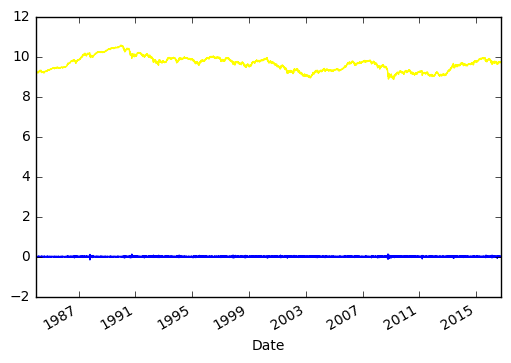

In [6]:
# 数値計算を効率的に行うための拡張モジュール numpy の勉強

# 株価データ取得モジュール 
import pandas_datareader.data as pdr

# 数値計算を効率的に行うための拡張モジュール
import numpy as np

# Matplotlib : 描画ライブラリ
%matplotlib inline
import matplotlib.pyplot as plt

start = "1949/5/6"
end = "2016/9/30"

# pandas_datareaderを使って、yahooからNIKKEI225のデータを読み込み <DataFrame>
n225 = pdr.DataReader("^N225", 'yahoo', start, end)
print('\n--- n225.Close.head(10) <Series> ---')
print(n225.Close.head(5))

# --------------------------------------
# ヒストリカル・ボラティリティを計算
# (価格の対数差分の標準偏差)

# 終値の対数取得
print('\n--- np.log(n225.Close).head(5) <Series> ---')
nplog = np.log(n225.Close)
print(nplog.head(5))

# 終値の対数の差分を取得
print('\n--- np.log(n225.Close).diff().head(5) <Series> ---')
nplogdiff = np.log(n225.Close).diff()
print(nplogdiff.head(5))

# 終値の対数の差分の様準偏差　デイリーベース
print('\n--- np.log(n225.Close).diff().std() <Value> ---')
nplogdiffstd = np.log(n225.Close).diff().std()
print(nplogdiffstd)

# 終値の対数の差分の様準偏差　デイリーベースを年率化する＝係数√250を掛ける（営業日が250日なため）
print('\n--- np.log(n225.Close).diff().std()  * np.sqrt(250) <Value> ---')
nplogdiffstd = np.log(n225.Close).diff().std() * np.sqrt(250)
print(nplogdiffstd)

# 終値の対数値と対数の差分をグラフ化
nplog.plot(color="yellow")
nplogdiff.plot(color="blue")

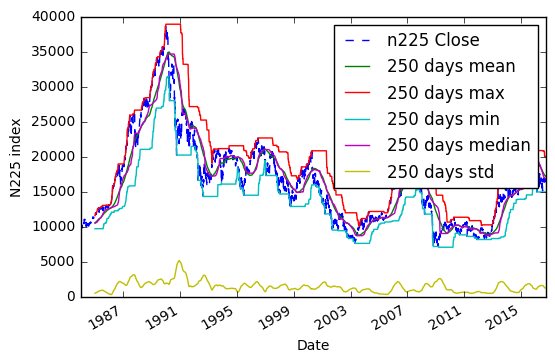

In [7]:
# --------------------------------------
# 移動平均を計算

# pandasモジュールをインポート
import pandas as pd

# 終値の250日移動平均を取得
window250_mean = pd.Series.rolling(n225.Close,window=250).mean()

# 終値の250日平均の最大値
window250_max =  pd.Series.rolling(n225.Close,window=250).max()

# 終値の250日平均の最小値
window250_min =  pd.Series.rolling(n225.Close,window=250).min()

# 終値の250日平均の中央値
window250_median =  pd.Series.rolling(n225.Close,window=250).median()

# 終値の250日平均の最大値
window250_std =  pd.Series.rolling(n225.Close,window=250).std()

# 終値のラベルと線種を設定
n225.Close.plot(label = 'n225 Close', style = '--')

# 移動平均、最大値、最小値、中央値、標準偏差のラベルを設定
window250_mean.plot(label = '250 days mean')
window250_max.plot(label = '250 days max')
window250_min.plot(label = '250 days min')
window250_median.plot(label = '250 days median')
window250_std.plot(label = '250 days std')

# グラフのラベルを設定
plt.ylabel('N225 index')

# 凡例を描画
plt.legend()


--- 1. np.log(n225.Close).diff().head(5) <Series> ---
Date
1984-01-04         NaN
1984-01-05    0.002013
1984-01-06    0.001406
1984-01-09   -0.000703
1984-01-10    0.006209
Name: Close, dtype: float64

--- 2. np.log(n225.Close).diff().dropna().head(5) <Series> ---
Date
1984-01-05    0.002013
1984-01-06    0.001406
1984-01-09   -0.000703
1984-01-10    0.006209
1984-01-11    0.005675
Name: Close, dtype: float64

--- 3. pd.Series.rolling(np.log(n225.Close).diff().dropna(), window=250) <Series> ---
Rolling [window=250,center=False,axis=0]

--- 4. pd.Series.rolling(np.log(n225.Close).diff().dropna(), window=250).std() * np.sqrt(250) <Series> ---
Date
1984-01-05         NaN
1984-01-06         NaN
1984-01-09         NaN
1984-01-10         NaN
1984-01-11         NaN
1984-01-12         NaN
1984-01-13         NaN
1984-01-17         NaN
1984-01-18         NaN
1984-01-19         NaN
1984-01-20         NaN
1984-01-23         NaN
1984-01-24         NaN
1984-01-25         NaN
1984-01-26         NaN

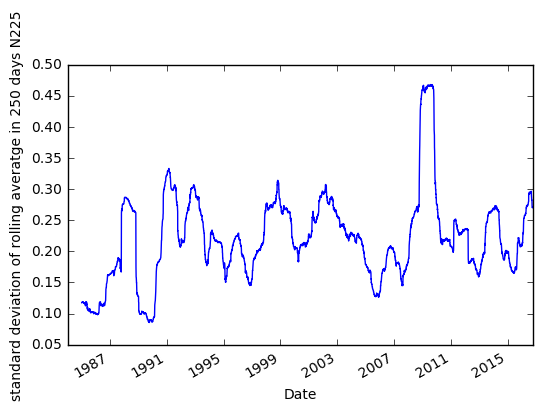

In [27]:
# 終値の対数の差分の様準偏差
print('\n--- 1. np.log(n225.Close).diff().head(5) <Series> ---')
nplogdiff = np.log(n225.Close).diff().head(5)
print(nplogdiff)

# 終値の対数の差分の様準偏差 欠損値を削除
print('\n--- 2. np.log(n225.Close).diff().dropna().head(5) <Series> ---')
nplogdiff = np.log(n225.Close).diff().dropna().head(5)
print(nplogdiff)

# 終値の対数の差分の様準偏差 欠損値を削除 移動平均
print('\n--- 3. pd.Series.rolling(np.log(n225.Close).diff().dropna(), window=250) <Series> ---')
nplogdiff = pd.Series.rolling(np.log(n225.Close).diff().dropna(), window=250)
print(nplogdiff)

# 終値の対数の差分の様準偏差 欠損値を削除 移動平均 標準偏差 ｘ √250
print('\n--- 4. pd.Series.rolling(np.log(n225.Close).diff().dropna(), window=250).std() * np.sqrt(250) <Series> ---')
nplogdiff = pd.Series.rolling(np.log(n225.Close).diff().dropna(), window=250).std() * np.sqrt(250)
print(nplogdiff)

nplogdiff.plot()
plt.ylabel('standard deviation of rolling averatge in 250 days N225')
